In [53]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import scipy.linalg

In [54]:
c = 10
m = 5
I = 3
l = 5
g = 9.81

T = 1

In [55]:
# functions to create the matrices Ax + Bu
def A():
    return np.array([[0, 0, 0, 0, 0, 0],
             [1, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0],
             [0, 0, 1, 0, 0, 0],
             [0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 1, 0]])
    
def B(theta, m, l, I):
    c = np.cos(theta)
    s = np.sin(theta)
    
    return np.array([[-s/m, c/m],
                    [0, 0],
                    [c/m, s/m],
                    [0, 0],
                    [0, l/I],
                    [0, 0]])


In [56]:
# see : https://en.wikipedia.org/wiki/Discretization#Discretization_of_linear_state_space_models
def discretize_AB(mat_a, mat_b, T):
    num_states = mat_a.shape[1]
    num_controls = mat_b.shape[1]
    
    blocked= np.zeros(2*(num_states + num_controls, ))
    blocked[:num_states, :num_states] = mat_a
    blocked[:num_states, num_states:] = mat_b
    
    exp_blocked = scipy.linalg.expm(blocked*T)

    mat_a_d = exp_blocked[:num_states, :num_states]
    mat_b_d = exp_blocked[:num_states, num_states:]
    
    return mat_a_d, mat_b_d

In [57]:
discretize_AB(A(), B(1, m, l, I), T)

(array([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1., 1.]]), array([[-0.1682942 ,  0.10806046],
        [-0.0841471 ,  0.05403023],
        [ 0.10806046,  0.1682942 ],
        [ 0.05403023,  0.0841471 ],
        [ 0.        ,  1.66666667],
        [ 0.        ,  0.83333333]]))

In [58]:
steps = 10

In [59]:
#using sympy to derive the dynamics
from sympy import *

In [112]:
# coordinates
x, y, theta = symbols("x y theta")
dx, dy, dtheta = symbols("dx dy dtheta")

# the state of the rocket
s = [x, dx, y, dy, theta, dtheta]

# forces
F_p, F_q = symbols("F_p F_q")

In [113]:
# transforming forces to global frame

In [132]:
# this is the derivative of the state s
def dstate(state, u):
    # please note: this looks like a list unpacking
    # but it will work on sympy matrices of 1 row, too
    # so I can just pass the state as a vector
    x, dx, y, dy, theta, dtheta = state
    F_p, F_q =  u
    
    F_x = -sin(theta) * F_p + cos(theta) * F_q
    F_y = cos(theta) * F_p + sin(theta) * F_q
    
    return Matrix([dx, F_x/m, dy, F_y/m - g, dtheta, F_q*l/I])

In [152]:
# now we apply runge-kutta
state = Matrix([x, dx, y, dy, theta, dtheta])
u = Matrix([F_p, F_q])

k1 = dstate(state, u)
k2 = dstate(state + T/2 * k1, u)
k3 = dstate(state + T/2 * k2, u)
k4 = dstate(state + T * k3, u)

rk = state + T/6 * (k1 + 2*k2 + 2*k3 + k4)

In [153]:
list(state)

[x, dx, y, dy, theta, dtheta]

In [163]:
u

Matrix([
[F_p],
[F_q]])

In [145]:
rk.shape

(6, 1)

In [146]:
rk = Matrix([x, dx, y, dy, theta, dtheta])

In [151]:
rk.jacobian([x, dx, y, dy, theta, dtheta])

Matrix([
[1, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0],
[0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 1, 0],
[0, 0, 0, 0, 0, 1]])

In [90]:
state0 = Matrix([x, dx, y, dy])
dstate = state.jacobian([x, dx, y, dy])

In [91]:
k1 = dstate

In [94]:
state1 = state0 + dstate * T/2

ShapeError: Matrix size mismatch: (4, 1) + (4, 4)

In [83]:
cos(1)

cos(1)

In [82]:
cos(x)

cos(x)

In [81]:
f = Function("f")
f(x) = 

SyntaxError: can't assign to function call (<ipython-input-81-3d7aeb5f6a92>, line 2)

In [36]:
df_dx = f.jacobian([x, dx, y, dy, theta, dtheta])

In [37]:
df_dx

Matrix([
[0, 1, 0, 0,                                    0, 0],
[0, 0, 0, 0, -F_p*cos(theta)/5 - F_q*sin(theta)/5, 0],
[0, 0, 0, 1,                                    0, 0],
[0, 0, 0, 0, -F_p*sin(theta)/5 + F_q*cos(theta)/5, 0],
[0, 0, 0, 0,                                    0, 1],
[0, 0, 0, 0,                                    0, 0]])

In [38]:
df_du = f.jacobian([F_p, F_q])

In [41]:
def dict_x(x_val, dx_val, y_val, dy_val, theta_val, dtheta_val):
    return {x: x_val, dx: dx_val,
            y: y_val, dy: dy_val,
            theta: theta_val, dtheta: dtheta_val}

In [42]:
def dict_u(F_p_val, F_q_val):
    return {F_p: F_p_val, F_q: F_q_val}

In [49]:
df_dx.subs({**dict_x(1, 2, 3, 4, 5, 6), **dict_u(1, 2)})

Matrix([
[0, 1, 0, 0,                      0, 0],
[0, 0, 0, 0, -cos(5)/5 - 2*sin(5)/5, 0],
[0, 0, 0, 1,                      0, 0],
[0, 0, 0, 0,  2*cos(5)/5 - sin(5)/5, 0],
[0, 0, 0, 0,                      0, 1],
[0, 0, 0, 0,                      0, 0]])

In [4]:
print(d_x)

d_x


In [5]:
A = MatrixSymbol("A", 6, 6)
B = MatrixSymbol("B", 6, 2)

In [6]:
Vector([x, d_x, y, d_y, theta, d_theta])

NameError: name 'Vector' is not defined

In [7]:
F_x = -sin(theta) * F_p + cos(theta) * F_q
F_y = cos(theta) * F_p + sin(theta) * F_q

In [8]:
f = Matrix([F_m /])

-F_p*sin(theta) + F_q*cos(theta)

In [8]:
trajectory = trajectory_end - trajectory_start * np.linspace(0, 1, steps+1).reshape((1, steps+1)) + trajectory_start

In [9]:
trajectory.shape

(6, 11)

In [10]:
import cvxpy as cvx

In [11]:
states = cvx.Variable(6, steps)
deltas = cvx.Variable(6, steps)
forces = cvx.Variable(2, steps)

In [12]:
constraints = []

In [13]:
# state transitions as constraint
for t in range(steps):
    
    # for the trajectory
    current_state = trajectory[:, t]
    next_state = trajectory[:, t+1]
    
    # read the current orientation,
    # set up linearization and discretize
    current_theta = current_state[5]
    mat_a = A()
    mat_b = B(current_theta, m, l, I)
    mat_a_d, mat_b_d = discretize_AB(mat_a, mat_b, T)
    
    # the next state is given by simulating the dynamics from the current trajectory position
    constraints.append(states[:, t] == mat_a_d@current_state + mat_b_d*forces[:, t] + np.array([0, 0, -T*g, -T**2/2*g, 0, 0]))
    
    # the delta is given by the difference between this state and the predicted trajectory
    constraints.append(next_state == states[:, t] + deltas[:, t])

In [14]:
# positions never below 0
constraints.append(states[1, :] > 0)
constraints.append(states[3, :] > 0)

# forces always positive
constraints.append(forces > 0)

In [15]:
objective = cvx.Minimize(cvx.sum_squares(deltas) + cvx.sum_squares(forces))

In [16]:
problem = cvx.Problem(objective, constraints)

In [17]:
problem.solve()

2808.548790787321

In [18]:
problem.status

'optimal_inaccurate'

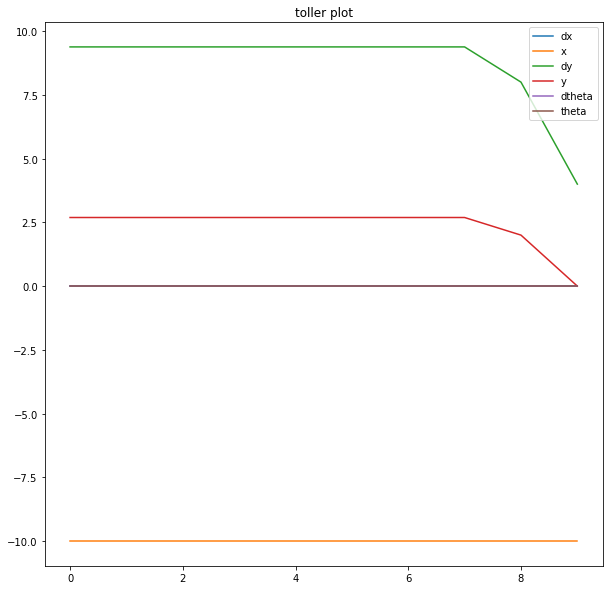

In [19]:
plt.figure(figsize=(10,10))
plt.title("toller plot")
plt.plot(deltas.value.T)
#plt.plot(forces.value.T)
plt.legend(["dx", "x", "dy", "y", "dtheta", "theta"])
#plt.legend(["fp", "fq"])
plt.show()

In [56]:
steps = 10000
states = np.zeros((6, steps+1))
states[:, 0] = trajectory[:, 0]

forces = np.zeros((2, steps))
forces[0, :] = m*g
forces[1, :] = 0.1

for t in range(steps):
    
    # read the current orientation,
    # set up linearization and discretize
    current_theta = states[5, t]
    mat_a = A()
    mat_b = B(current_theta, m, l, I)
    mat_a_d, mat_b_d = discretize_AB(mat_a, mat_b, T)
    
    # the next state is given by simulating the dynamics from the current trajectory position
    states[:, t+1] = mat_a_d@states[:, t] + mat_b_d@forces[:, t]# - np.array([0, 0, T*g, T**2/2*g, 0, 0])


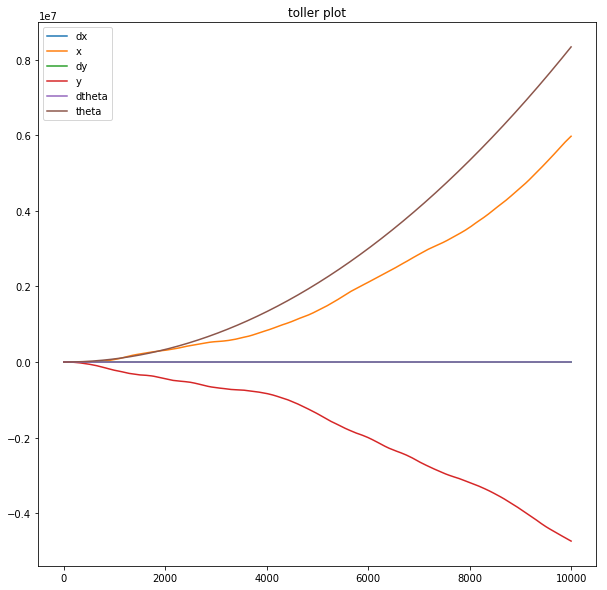

In [57]:
plt.figure(figsize=(10,10))
plt.title("toller plot")
plt.plot(states.T[:,:])
#plt.plot(forces.value.T)
plt.legend(["dx", "x", "dy", "y", "dtheta", "theta"])
plt.show()

In [43]:
m

5

In [44]:
g

9.81

In [22]:
t

99

In [23]:
# read the current orientation,
# set up linearization and discretize
current_theta = states[5, t]
mat_a = A()
mat_b = B(current_theta, m, l, I)
mat_a_d, mat_b_d = discretize_AB(mat_a, mat_b, T)

# the next state is given by simulating the dynamics from the current trajectory position
states[:, t+1] == mat_a_d@states[:, t] + mat_b_d@forces[:, t] #- np.array([0, 0, -T*g, -T**2/2*g, 0, 0])

array([ True,  True, False, False,  True,  True])

In [24]:
states[:, 0]

array([  0., 100.,   0.,  20.,   0.,   0.])

In [25]:
mat_a_d

array([[1., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 1.]])

In [26]:
mat_b_d

array([[-0.01280921,  0.19958939],
       [-0.00640461,  0.09979469],
       [ 0.19958939,  0.01280921],
       [ 0.09979469,  0.00640461],
       [ 0.        ,  1.66666667],
       [ 0.        ,  0.83333333]])

In [27]:
mat_a_d@states[:, 0] + mat_b_d@forces[:, 0]

array([-1.86780175e-02,  9.99906610e+01, -2.12398602e-02,  1.99893801e+01,
       -1.66666667e-01, -8.33333333e-02])

In [28]:
states[:, 0]

array([  0., 100.,   0.,  20.,   0.,   0.])

In [29]:
mat_a_d

array([[1., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 1.]])